In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#Load data
Market=pd.read_excel('Market_Portfolio.xlsx',index_col=0,parse_dates=True)
Industry_10=pd.read_excel('Industry_Portfolios.xlsx',index_col=0,parse_dates=True)
Market=Market.applymap(lambda x: x*0.01)
Industry_10=Industry_10.applymap(lambda x: x*0.01)
Rf=0.13*0.01

In [3]:
#Excess return for both market and Industries
Industry_excess=Industry_10-Rf
Market_excess=Market-Rf

In [12]:
#Linear regression using Sklearn
lm=LinearRegression()

In [5]:
#Calculate ALpha and Beta for each Industry asset over the Market
alpha=[]
beta=[]
for i in Industry_excess:
    lm.fit(Market_excess,Industry_excess[i])
    alpha.append(lm.intercept_)
    beta.append(lm.coef_)
beta=[float(j) for j in beta] #remove the list bracket

In [6]:
#Create dataframe for each asset's alpha and beta
dct={'Alpha':alpha,'Beta':beta}
df=pd.DataFrame(dct,index=Industry_excess.columns)
print('Alpha and Beta for Each Industry asset is shown below:')
df

Alpha and Beta for Each Industry asset is shown below:


,Alpha,Beta
NoDur,0.003694,0.652647
Durbl,-0.004156,1.648536
Manuf,0.001598,1.169846
Enrgy,0.005017,0.969850
HiTec,-0.000640,1.132969
Telcm,0.001947,0.900729
Shops,0.002755,0.826492
Hlth,0.002378,0.673036
Utils,0.004446,0.538086
Other,-0.003871,1.207309


In [7]:
#Add mean return for each asset
Industry_mean=Industry_10.mean()
Market_mean=Market.mean()
df['Return']=Industry_10.mean()
df.loc['Market']=[np.nan,float(1),float(Market_mean)]
df

,Alpha,Beta,Return
NoDur,0.003694,0.652647,0.009028
Durbl,-0.004156,1.648536,0.007333
Manuf,0.001598,1.169846,0.010128
Enrgy,0.005017,0.969850,0.012312
HiTec,-0.000640,1.132969,0.007662
Telcm,0.001947,0.900729,0.008814
Shops,0.002755,0.826492,0.009163
Hlth,0.002378,0.673036,0.007838
Utils,0.004446,0.538086,0.009072
Other,-0.003871,1.207309,0.004891


In [8]:
#Linear regression for mean return and Beta
beta=np.array(df.Beta).reshape(-1,1)
returns=np.array(df.Return).reshape(-1,1)
LM=LinearRegression()
LM.fit(beta,returns)
intercept=float(LM.intercept_)
slope=float(LM.coef_)
print('Slope: {:.04f} \nIntercept: {:.04f}'.format(slope,intercept))

Slope: -0.0019 
Intercept: 0.0103


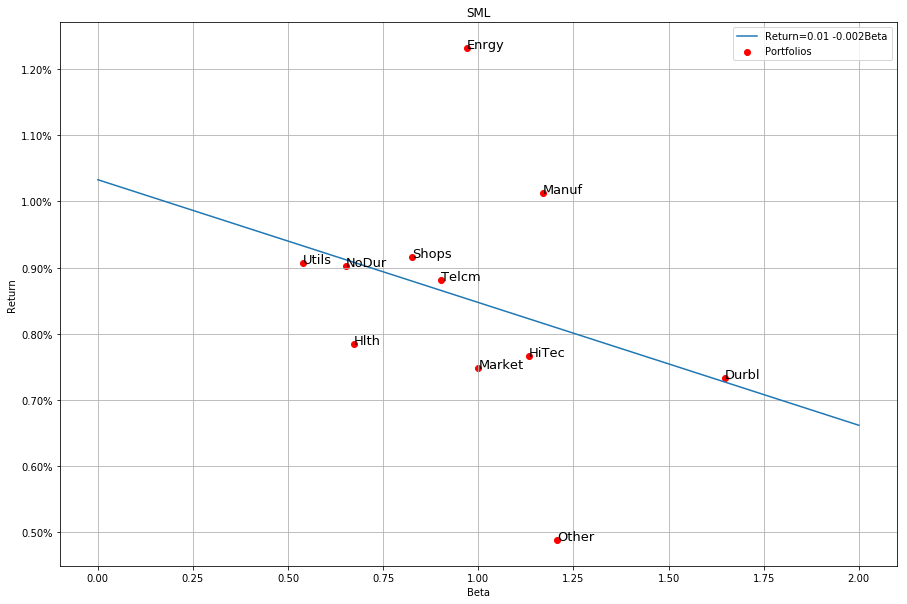

In [9]:
# Plot SML as instructed
plt.figure(figsize=(15,10))
plt.plot([0,2],[intercept,slope*2+intercept],label='Return={} {}Beta'.format(round(intercept,3),round(slope,3)))
plt.scatter(df.Beta,df.Return,c='r',label='Portfolios')
for i,b,r in zip(df.index,df.Beta,df.Return):
    plt.annotate('{}'.format(i),xy=(b,r),fontsize=13) 
plt.gca().set_yticklabels(['{:.02f}%'.format(y*100) for y in plt.gca().get_yticks()]) # format y axis to %
plt.xlabel('Beta')
plt.ylabel('Return')
plt.title('SML')
plt.grid()
plt.legend()
plt.savefig('SML',dpi=500)
plt.show()

# Optional : Ri=Rf+beta*(Rm-Rf)

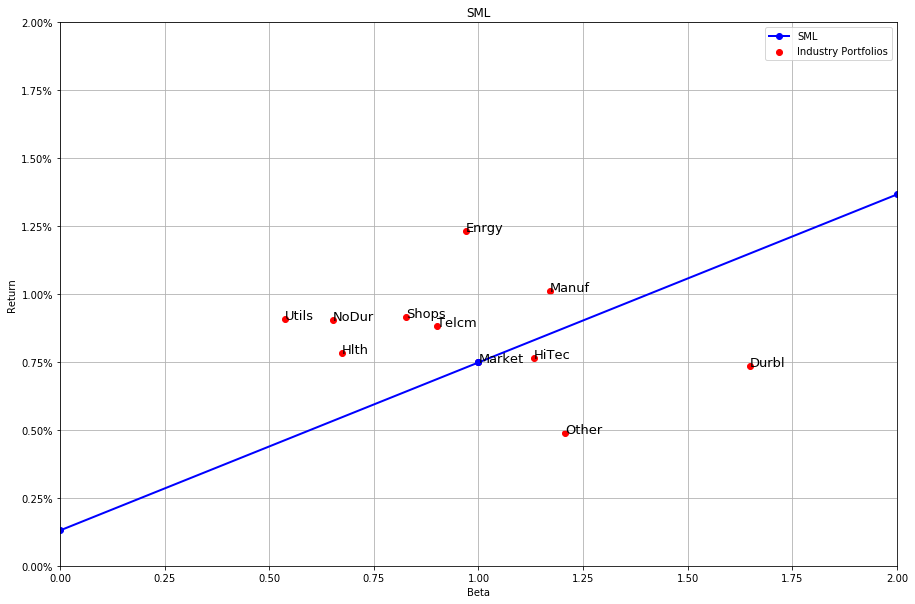

In [11]:
#Plot SML line : regress Ri over Rm-Rf
plt.figure(figsize=(15,10))
plt.title('SML')
plt.plot([0,1],[Rf,Market_mean],c='b',linewidth=2,marker='o')
plt.plot([1,2],[Market_mean,2*(Market_mean-Rf)+Rf],c='b',linewidth=2,marker='o',label='SML')
plt.scatter(df.Beta,df.Return,c='r',label='Industry Portfolios')
for i,b,r in zip(df.index,df.Beta,df.Return):
    plt.annotate('{}'.format(i),xy=(b,r),fontsize=13)   
plt.xlim(0,2)
plt.ylim(0,0.02)
plt.xlabel('Beta')
plt.ylabel('Return')
plt.gca().set_yticklabels(['{:.02f}%'.format(y*100) for y in plt.gca().get_yticks()]) # format y axis to %
plt.legend()
plt.savefig('SML 1',dpi=500)
plt.grid()
plt.show()